In [10]:
import pandas as pd
import numpy as np


# Reading the data

In [11]:
df=pd.read_csv('webtraffic.csv')
df.head()


,Hour Index,Sessions
0,0,1418159421
1,1,1113769116
2,2,919158921
3,3,822352824
4,4,735526737


In [12]:
df.shape

(4896, 2)

In [13]:
sessions = df['Sessions'].values

In [14]:
def prepare_data(seq, num):
    x = []
    y = []
    for i in range(0, (len(seq)- num), 1):
        input_ = seq[i:i+num]
        output = seq[i+num]
        
        x.append(input_)
        y.append(output)
    
    return np.array(x), np.array(y)

In [15]:
num = 168
x,y = prepare_data(sessions, num)
print(len(x))

4728


In [16]:
ind = int(0.9*len(x))

# prepare training and test data
X_train = x[:ind]
y_train = y[:ind]

X_test = x[ind:]
y_test = y[ind:]

In [26]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.fit_transform(X_test)

In [27]:
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

In [28]:
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)[:, 0]
y_test = y_scaler.fit_transform(y_test)[:, 0]

In [29]:
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_train.shape)




(4255, 168, 1)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *

In [7]:
model= Sequential()

In [19]:
model.add(Conv1D(64, 3, padding='same', activation='relu',input_shape=(num,1)))

In [20]:
model.add(Conv1D(32, 5, padding='same', activation='relu',input_shape=(num,1)))

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 168, 64)           256       
                                                                 
 conv1d_1 (Conv1D)           (None, 168, 32)           10272     
                                                                 
 flatten (Flatten)           (None, 5376)              0         
                                                                 
 dense (Dense)               (None, 64)                344128    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 354,721
Trainable params: 354,721
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Define the optimizer and loss:
model.compile(loss='mse',optimizer='adam')
# Define the callback to save the best model during the training
mc = ModelCheckpoint('best_model.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode='min')
# Train the model for 30 epochs with batch size of 32:
history=model.fit(X_train, y_train ,epochs=30, batch_size=32, validation_data=(X_test,y_test),callbacks=[mc])

Epoch 1/30
131/133 [============================>.] - ETA: 0s - loss: 0.0798
Epoch 1: val_loss improved from inf to 0.04610, saving model to best_model.hdf5
133/133 [==============================] - 4s 26ms/step - loss: 0.0791 - val_loss: 0.0461
Epoch 2/30
132/133 [============================>.] - ETA: 0s - loss: 0.0225
Epoch 2: val_loss improved from 0.04610 to 0.03654, saving model to best_model.hdf5
133/133 [==============================] - 3s 25ms/step - loss: 0.0226 - val_loss: 0.0365
Epoch 3/30
131/133 [============================>.] - ETA: 0s - loss: 0.0180
Epoch 3: val_loss improved from 0.03654 to 0.02607, saving model to best_model.hdf5
133/133 [==============================] - 3s 25ms/step - loss: 0.0180 - val_loss: 0.0261
Epoch 4/30
133/133 [==============================] - ETA: 0s - loss: 0.0163
Epoch 4: val_loss did not improve from 0.02607
133/133 [==============================] - 3s 24ms/step - loss: 0.0163 - val_loss: 0.0283
Epoch 5/30
132/133 [=================

In [36]:
model.load_weights('best_model.hdf5')

In [42]:
mse = model.evaluate(X_test,y_test)
print("Mean Square Error:",mse)

15/15 [==============================] - 0s 8ms/step - loss: 0.0195
Mean Square Error: 0.019537167623639107


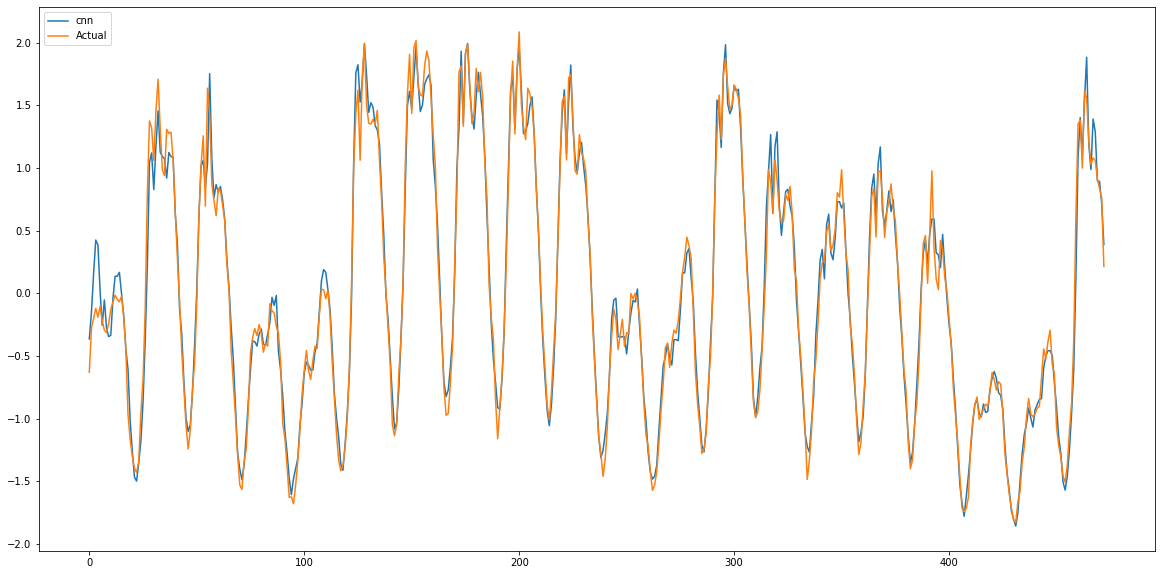

In [49]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(pred,label='cnn')
plt.plot(y_test,label='Actual')
plt.legend(loc="upper left")
plt.show()